In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
train_df = pd.read_csv('ttrain.csv')
test_df = pd.read_csv('ttest.csv')

In [5]:
print(train_df.shape, test_df.shape)

(891, 12) (418, 11)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.duplicated().sum()

0

<AxesSubplot:>

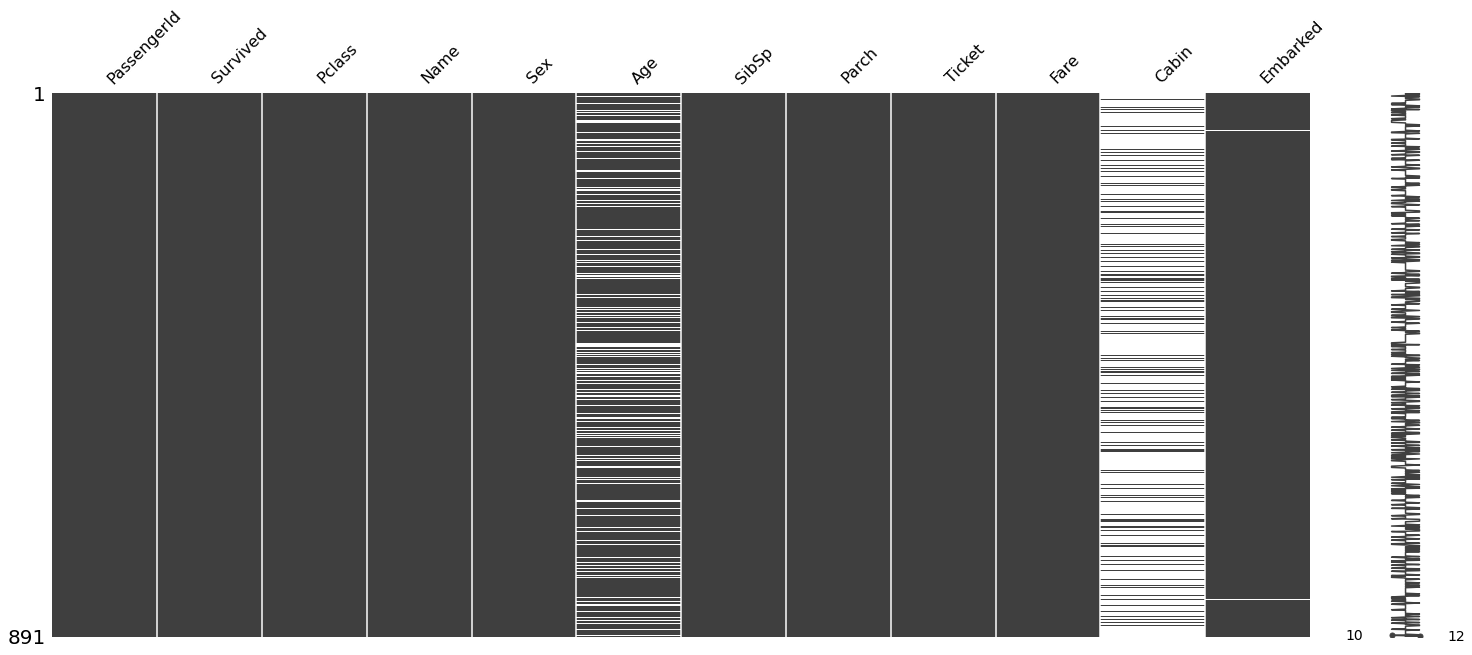

In [10]:
msno.matrix(train_df)

<AxesSubplot:>

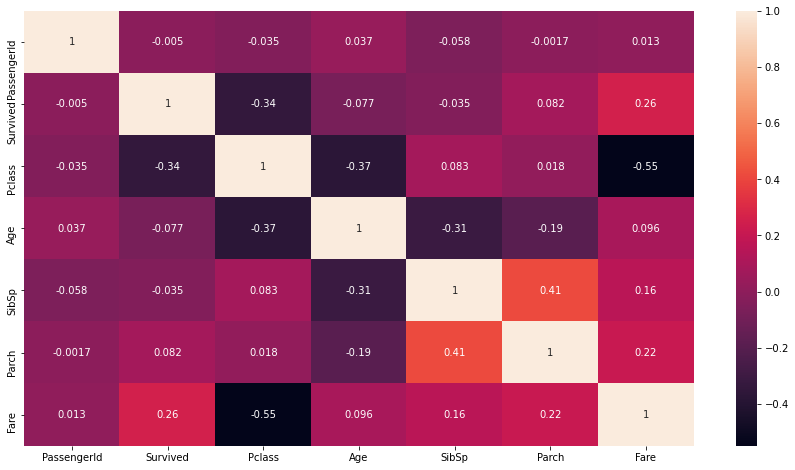

In [11]:
corr = train_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

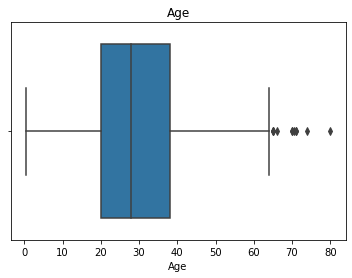

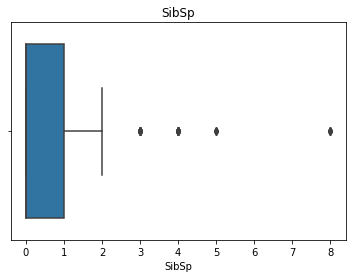

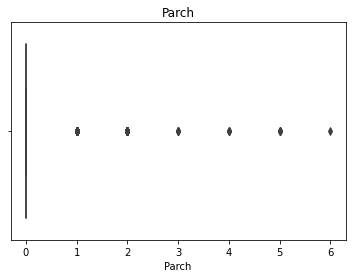

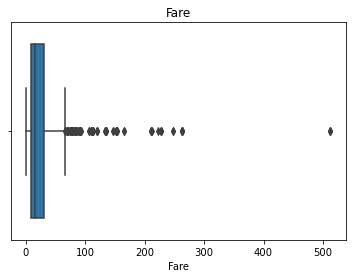

In [12]:
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    plt.title(col)
    sns.boxplot(train_df[col])
    plt.show()

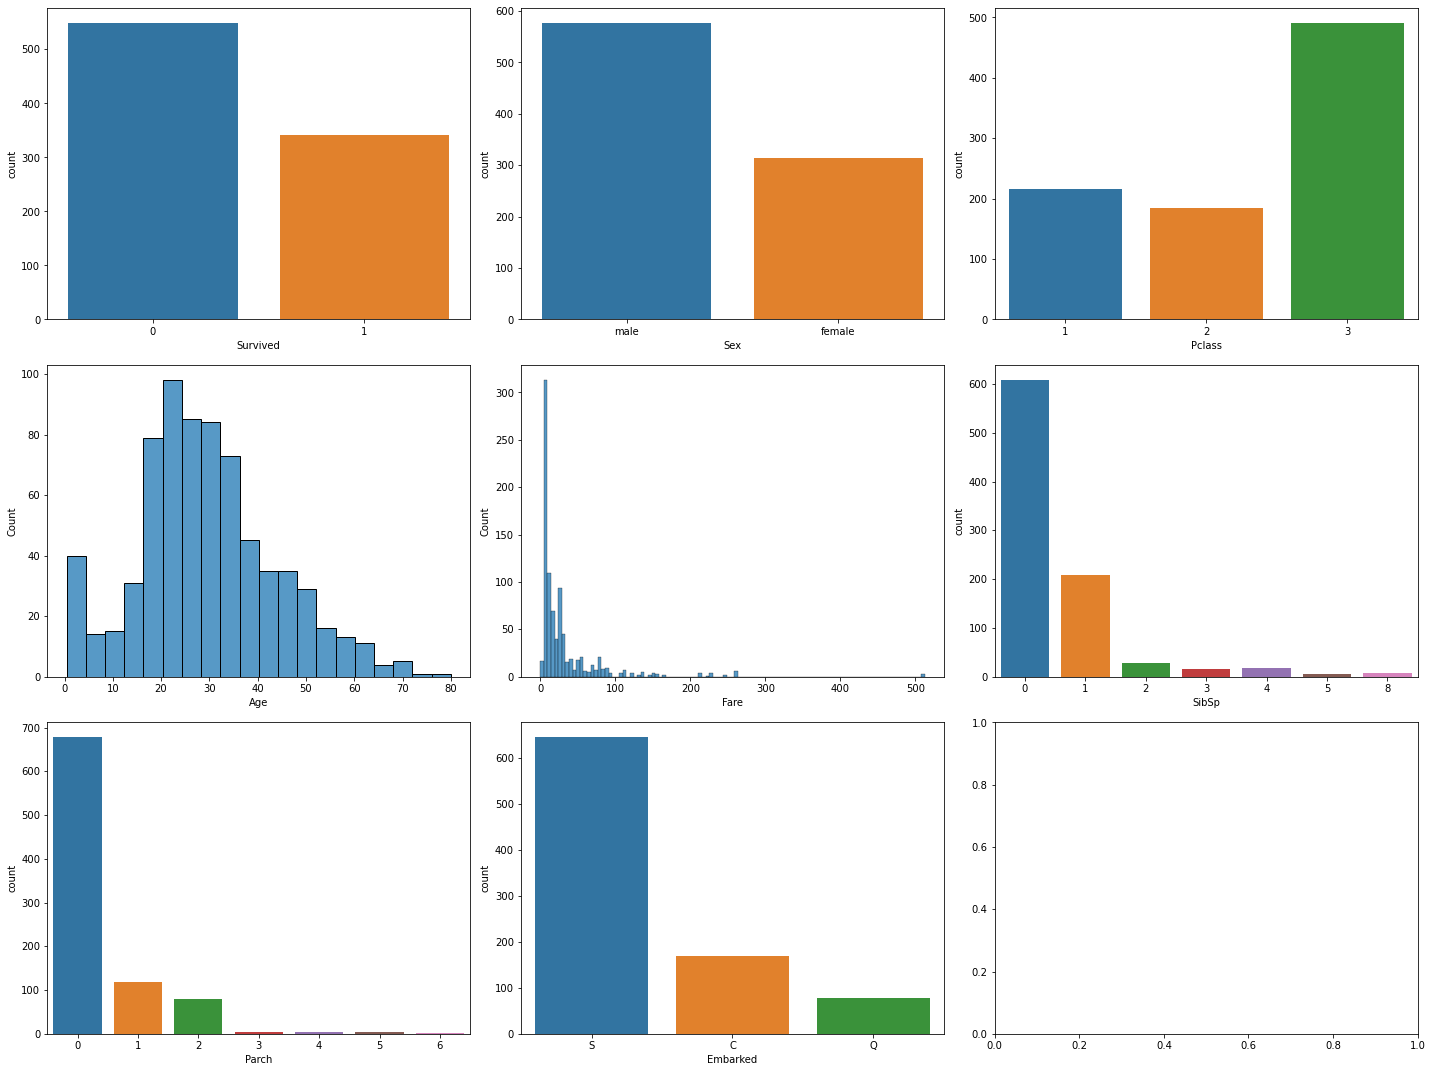

In [13]:
fig, axes = plt.subplots(3,3, figsize=(20,15))

sns.countplot(ax=axes[0,0], data=train_df, x='Survived')
sns.countplot(ax=axes[0,1], data=train_df, x='Sex')
sns.countplot(ax=axes[0,2], data=train_df, x='Pclass')
sns.histplot(ax=axes[1,0], data=train_df, x='Age')
sns.histplot(ax=axes[1,1], data=train_df, x='Fare')
sns.countplot(ax=axes[1,2], data=train_df, x='SibSp')
sns.countplot(ax=axes[2,0], data=train_df, x='Parch')
sns.countplot(ax=axes[2,1], data=train_df, x='Embarked')

plt.tight_layout()
plt.show()

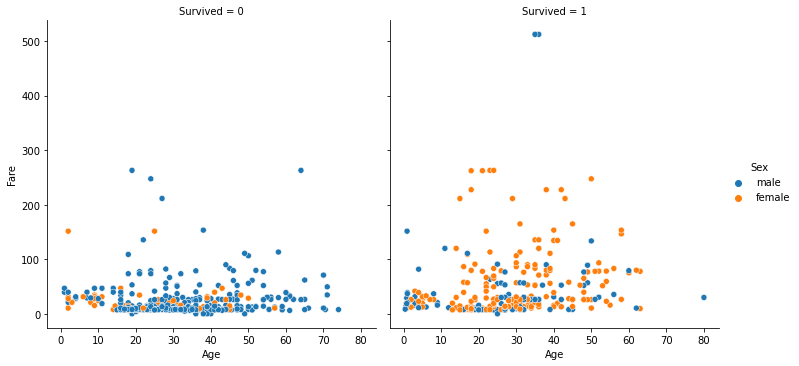

In [14]:
sns.relplot(data=train_df, x='Age', y='Fare', hue='Sex', col='Survived') 

In [15]:
sexes = train_df.Sex.unique()
count = list()

for sex in sexes:
    percentage = round(len(train_df[(train_df.Sex == sex) & (train_df.Survived == 1)]) / len(train_df[train_df.Sex == sex]), 3) * 100
    count.append(percentage)
    
print(count) 

[18.9, 74.2]


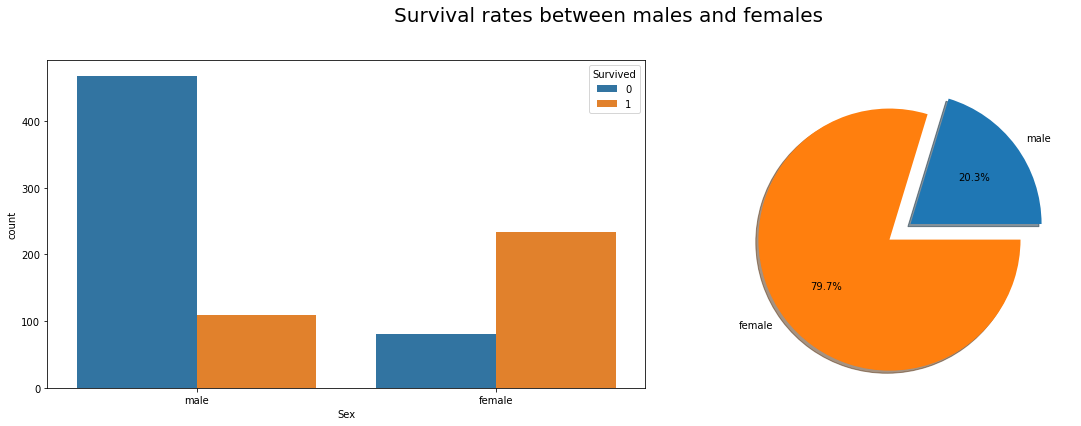

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,6))
fig.suptitle('Survival rates between males and females\n', fontsize=20)

sns.countplot(ax=ax1, data=train_df, x='Sex', hue='Survived')
plt.pie(count, labels=sexes, explode=[0, 0.2], shadow=True, autopct='%1.1f%%')

plt.tight_layout()

In [17]:
p_classes = train_df.Pclass.unique()
pcts = list()

for p in p_classes:
    percentage = round(len(train_df[(train_df.Pclass == p) & (train_df.Survived == 1)]) / len(train_df[train_df.Pclass == p]),3) * 100
    pcts.append(percentage)
    
print(pcts) 

[24.2, 63.0, 47.3]


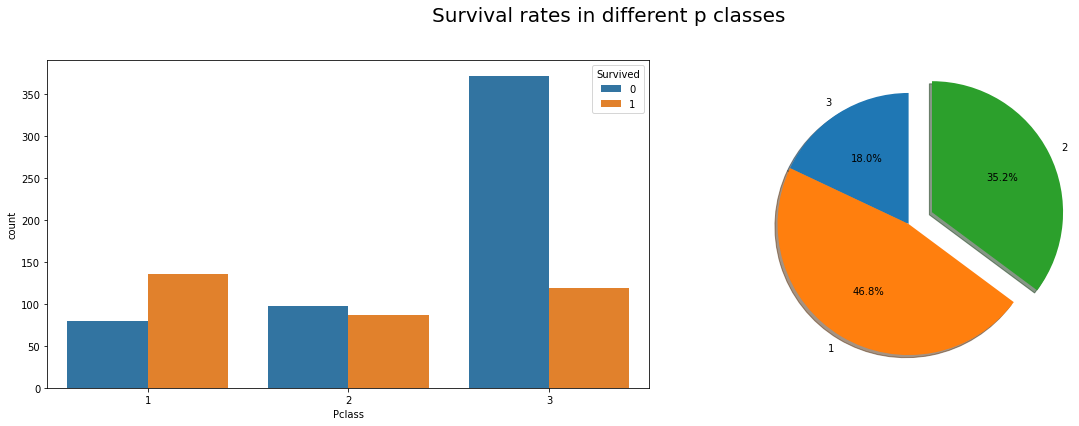

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,6))
fig.suptitle('Survival rates in different p classes\n', fontsize=20)

sns.countplot(ax=ax1, data=train_df, x='Pclass', hue='Survived')
plt.pie(pcts, labels=p_classes, explode=[0, 0., 0.2], shadow=True, autopct='%1.1f%%', startangle=90)

plt.tight_layout()

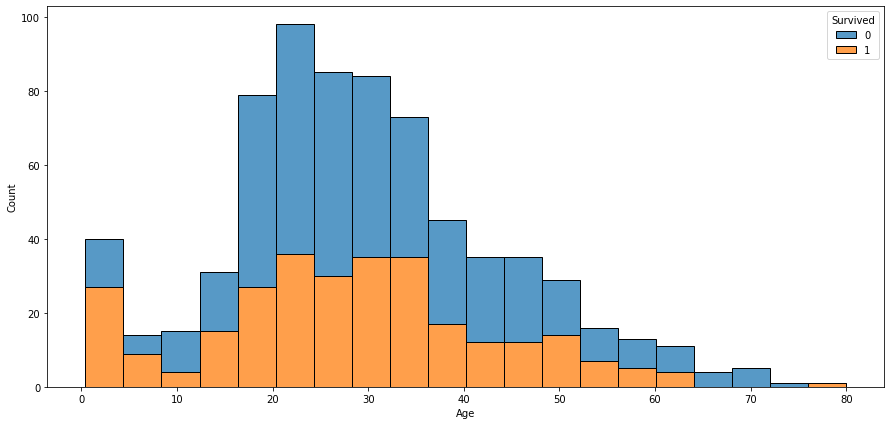

In [19]:
plt.figure(figsize=(15,7))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

class FE:
    def __init__(self, dataframes):
        self.dataframes = dataframes
        
    def remove_cols(self):
        for df in self.dataframes:
            try:
                df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
            except:
                pass
        
    def convert_sex(self):
        for df in self.dataframes:
            le = LabelEncoder()
            df.Sex = le.fit_transform(df.Sex)

In [21]:
fe = FE([train_df, test_df])
fe.remove_cols()
fe.convert_sex()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = train_df[features]
y = train_df['Survived']

In [24]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=2)

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x, train_y)

lr_pred = lr.predict(test_x)

lr_acc = accuracy_score(lr_pred, test_y)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(train_x, train_y)

knn_pred = knn.predict(test_x)

knn_acc = accuracy_score(knn_pred, test_y)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_x, train_y)

rfc_pred = rfc.predict(test_x)

rfc_acc = accuracy_score(rfc_pred, test_y)

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)

dtc_pred = dtc.predict(test_x)

dtc_acc = accuracy_score(dtc_pred, test_y)

In [29]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(train_x, train_y)

clf_pred = clf.predict(test_x)

clf_acc = accuracy_score(clf_pred, test_y)

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x, train_y)

gnb_pred = gnb.predict(test_x)

gnb_acc = accuracy_score(gnb_pred, test_y)

In [31]:
df_score = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine', 'Naive Bayes'],
                        'accuracy':[lr_acc, knn_acc, rfc_acc, dtc_acc, clf_acc, gnb_acc]})

In [32]:
df_score.sort_values('accuracy', ascending=False)

,model,accuracy
0,Logistic Regression,0.789238
5,Naive Bayes,0.775785
1,KNN,0.771300
4,Support Vector Machine,0.771300
2,Random Forest Classifier,0.762332
3,Decision Tree Classifier,0.757848


In [33]:
df_score.accuracy.mean()

0.7713004484304933

In [34]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine', 'Naive Bayes']
model_selectors = [lr, knn, rfc, dtc, clf, gnb]
scores_dict = {'model':[], 'accuracy':[]}

for label, selector in zip(model_names, model_selectors):
    cv_mean_score = np.mean(cross_val_score(selector, X, y, cv=5))
    scores_dict['model'].append(label)
    scores_dict['accuracy'].append(cv_mean_score)    
    
df_cv_score = pd.DataFrame(scores_dict)

In [35]:
df_cv_score.sort_values('accuracy', ascending=False)

,model,accuracy
0,Logistic Regression,0.799084
4,Support Vector Machine,0.786737
2,Random Forest Classifier,0.785663
3,Decision Tree Classifier,0.784540
1,KNN,0.778934
5,Naive Bayes,0.765470


In [36]:
df_cv_score.accuracy.mean()

0.7834044734584561